In [1]:
!pip install opencv-python

     -------------------------------------- 38.2/38.2 MB 331.7 kB/s eta 0:00:00


In [2]:
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 23.2/23.2 MB 4.6 MB/s eta 0:00:00
  Using cached grpcio-1.51.3-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
     ---------------------------------------- 6.0/6.0 MB 5.2 MB/s eta 0:00:00
     ----

In [3]:
import pandas as pd
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle           
from tqdm import tqdm

In [4]:
class_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

IMAGE_SIZE = (150,150)

In [6]:
def load_data():
   
    datasets = [r"C:\Users\narma\Downloads\notebook\DATASET\TRAIN", r"C:\Users\narma\Downloads\notebook\DATASET\TEST"]
    output = []
    
    # Iterate through the training and test set.
    for dataset in datasets:
        
        images = [] 
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each Subfolder corresponding to a category  
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Image path should be obtained
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv.imread(img_path)
                image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                image = cv.resize(image, IMAGE_SIZE) 
                
                # Append the image along with its label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        
        # Shuffle the images to introduce some randomness in our data
        images, labels = shuffle(images, labels)
        
        
        output.append((images, labels))

    return output

In [7]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\narma\Downloads\notebook\DATASET\TRAIN


100%|████████████████████████████████████████████████████████████████████████████████| 252/252 [00:18<00:00, 13.87it/s]


Loading C:\Users\narma\Downloads\notebook\DATASET\TEST


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [00:09<00:00, 11.50it/s]


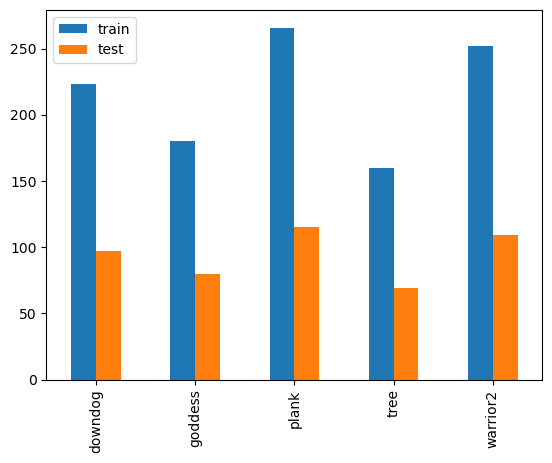

In [8]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,'test': test_counts}, index=class_names).plot.bar()
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, batch_size = 28, epochs=15, validation_split = 0.3)

Epoch 1/15
27/27 [==============================] - 24s 791ms/step - loss: 1.6032 - accuracy: 0.2315 - val_loss: 1.5960 - val_accuracy: 0.2308
Epoch 2/15
27/27 [==============================] - 21s 763ms/step - loss: 1.5591 - accuracy: 0.2844 - val_loss: 1.4785 - val_accuracy: 0.3877
Epoch 3/15
27/27 [==============================] - 20s 757ms/step - loss: 1.4199 - accuracy: 0.4114 - val_loss: 1.3333 - val_accuracy: 0.4800
Epoch 4/15
27/27 [==============================] - 21s 770ms/step - loss: 1.2787 - accuracy: 0.4656 - val_loss: 1.2689 - val_accuracy: 0.5015
Epoch 5/15
27/27 [==============================] - 21s 767ms/step - loss: 1.2571 - accuracy: 0.4788 - val_loss: 1.1001 - val_accuracy: 0.5477
Epoch 6/15
27/27 [==============================] - 21s 764ms/step - loss: 1.1404 - accuracy: 0.5476 - val_loss: 1.1536 - val_accuracy: 0.6000
Epoch 7/15
27/27 [==============================] - 21s 769ms/step - loss: 1.0136 - accuracy: 0.5966 - val_loss: 1.0590 - val_accuracy: 0.6123

# To visualize how our model is performing, we plot the accuracy and the loss during the training

In [14]:
def plot_performance(history):

    fig = plt.figure(figsize=(15,8))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("Training_accuracy vs Validation_accuracy")
    plt.ylabel("ACCURACY")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss_function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("Training_loss vs Validation_loss")
    plt.ylabel("LOSS")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

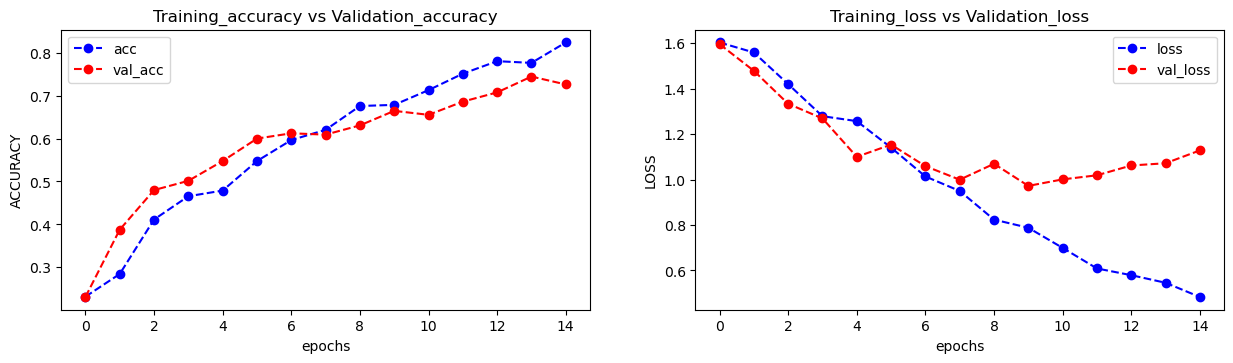

In [15]:
plot_performance(history)

# **The model is not perfect as we can clearly observe the Validation loss slightly flattening though the training loss is going down and the accuracy of the model is improving.
# Reason could be insufficient training data and hence it could be improved by adding more training data.

In [16]:
test_loss = model.evaluate(test_images, test_labels)

15/15 [==============================] - 2s 132ms/step - loss: 0.6009 - accuracy: 0.8809


# We now make predictions on the test data set.

In [17]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions,axis=1)  # np.argmax is used since each prediction would be an array of...
                                             # probabilities and we need to pick the max value. 
pred_labels

15/15 [==============================] - 2s 130ms/step


array([1, 1, 2, 4, 4, 3, 4, 4, 2, 4, 0, 0, 1, 2, 4, 0, 2, 0, 2, 2, 4, 4,
       4, 1, 0, 0, 1, 2, 2, 1, 4, 4, 2, 4, 4, 4, 1, 2, 4, 3, 3, 2, 4, 2,
       4, 3, 4, 2, 2, 1, 3, 1, 0, 2, 2, 3, 2, 0, 1, 2, 0, 4, 2, 4, 0, 4,
       3, 4, 0, 0, 4, 2, 0, 1, 3, 4, 0, 4, 4, 2, 0, 0, 4, 2, 0, 4, 0, 3,
       1, 0, 4, 0, 4, 2, 4, 3, 0, 3, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2,
       2, 3, 4, 1, 2, 4, 0, 3, 2, 2, 1, 2, 2, 4, 3, 2, 1, 0, 0, 1, 2, 2,
       2, 2, 1, 4, 2, 0, 0, 2, 2, 1, 4, 4, 0, 2, 1, 1, 4, 1, 4, 2, 2, 2,
       1, 2, 3, 3, 0, 0, 0, 4, 0, 0, 4, 0, 2, 4, 2, 3, 1, 3, 4, 2, 3, 1,
       1, 4, 1, 2, 4, 2, 3, 0, 0, 3, 4, 2, 1, 4, 1, 2, 4, 2, 3, 2, 1, 0,
       4, 4, 4, 1, 4, 2, 0, 1, 3, 4, 3, 4, 3, 3, 0, 2, 4, 3, 3, 0, 4, 0,
       2, 2, 4, 1, 4, 3, 3, 3, 1, 0, 2, 3, 2, 0, 2, 3, 1, 0, 4, 4, 4, 4,
       3, 0, 2, 2, 0, 4, 4, 2, 2, 4, 4, 0, 2, 0, 0, 4, 4, 3, 0, 1, 0, 0,
       2, 4, 2, 1, 2, 0, 3, 2, 4, 4, 4, 0, 2, 2, 0, 2, 3, 4, 4, 4, 2, 3,
       2, 4, 2, 1, 4, 4, 0, 4, 4, 0, 0, 4, 3, 3, 4,

# Plotting the images along with their actual class and predicted class would give us a proper idea about how our model is making predictions.

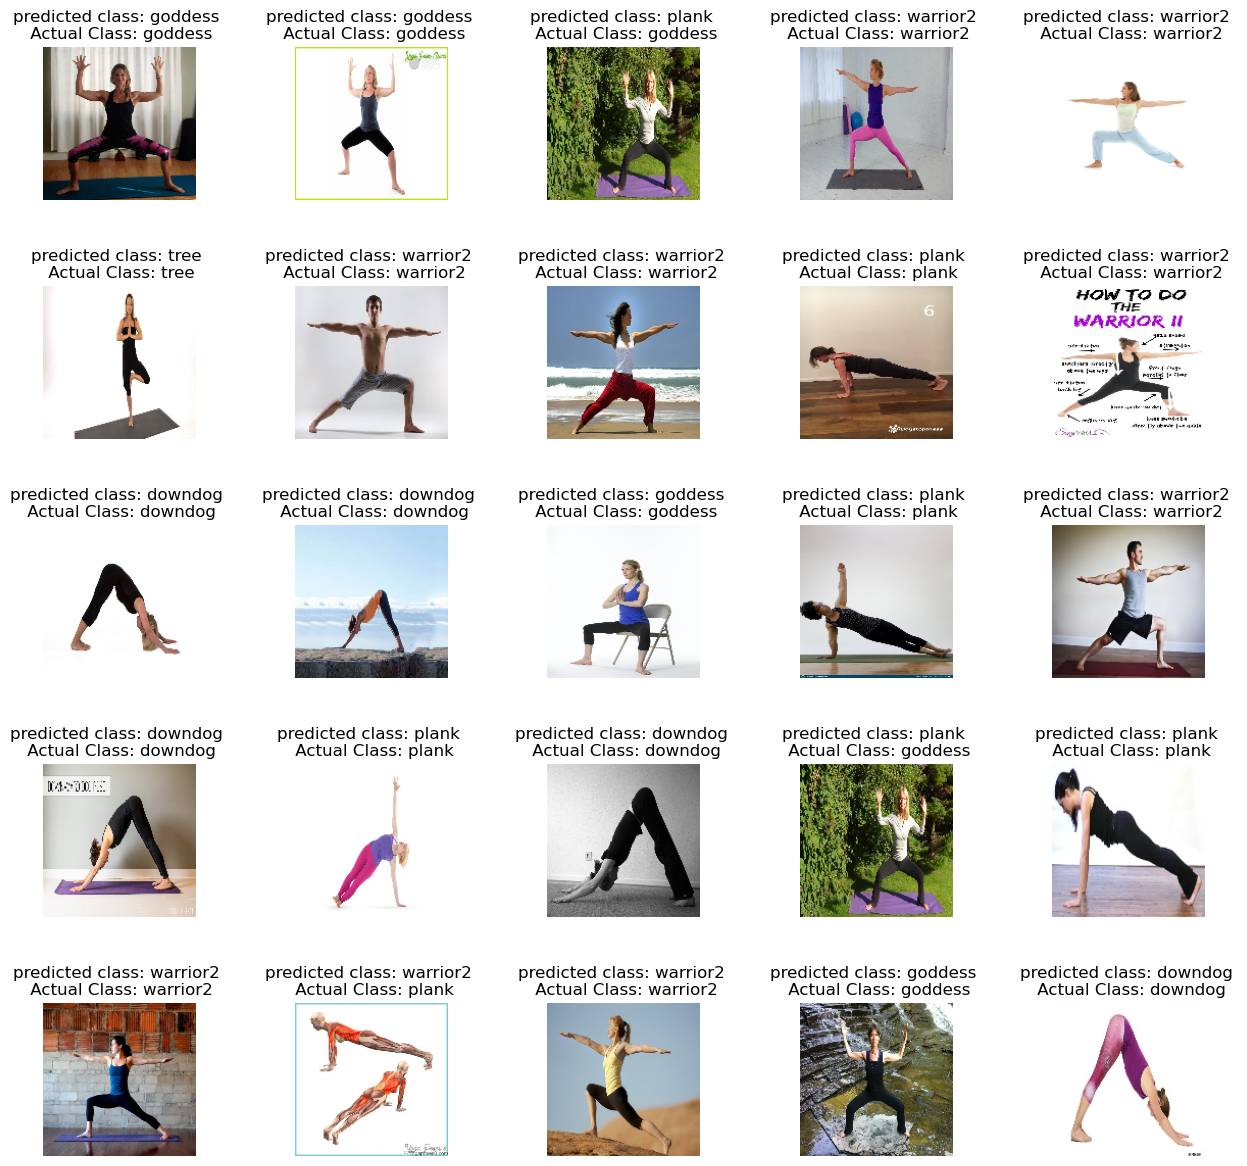

In [18]:
fig, ax = plt.subplots(5,5, figsize = (15,15))
ax = ax.ravel()

for i in range(0,25):  
    ax[i].imshow(test_images[i])
    ax[i].set_title(f"predicted class: {class_names[pred_labels[i]]} \n Actual Class: {class_names[test_labels[i]]}")
    ax[i].axis('off')
plt.subplots_adjust(wspace=0.65)

# A basic CNN model is created, Any suggestions to improve the model are welcome.

In [19]:
import pickle
Pkl_Filename = "ypd.pkl"  
pickle.dump(model, open(Pkl_Filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_2
......vars
...layers\activation_3
......vars
...layers\activation_4
......vars
...layers\activation_5
......vars
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...layers\max_pooling2d_3
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
...

In [20]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-05 19:11:24         5948
metadata.json                                  2023-03-05 19:11:24           64
variables.h5                                   2023-03-05 19:11:24      7767544
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_2
......vars
...layers\activation_3
......vars
...layers\activation_4
......vars
...layers\activation_5
......vars
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooli

In [ ]:
score = Pickled_LR_Model.score(test_images, test_labels)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(test_images)  

Ypredict